<a href="https://colab.research.google.com/github/RonnyGuevara/Computer_Graphics/blob/main/TP5/CG5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Código HTML

In [ ]:
<doctype html>
<html>
<head>
<title>FCG 2021 - TP4</title>

<!-- estilo-->
<link href="style.css" rel="stylesheet">

<script type="text/javascript" id="includedscript" src="boxdrawer.js"></script>
<script type="text/javascript" id="includedscript" src="pyramid.js"></script>
<script type="text/javascript" id="includedscript" src="project4.js"></script>
<script type="text/javascript" id="includedscript" src="ejercicio.js"></script>

</head>
<body onresize="WindowResize()">
	<!-- canvas (WebGL)-->
	<div id="canvas-div"><canvas id="canvas"></canvas></div><div id="controls-div">
		<!-- menu y controles-->
		<div id="controls">
			<div class="control-group">
				<div class="control"><input id="show-box" name="show-box" type="checkbox" onchange="DrawScene()" checked /><label for="show-box"> Mostrar caja</label></div>
				<div class="control"><input id="show-texture" name="show-texture" type="checkbox" onchange="ShowTexture(this)" checked /><label for="show-texture"> Mostrar textura </label></div>
				<div class="control"><input id="swap-yz" name="swap-yz" type="checkbox" onchange="SwapYZ(this)" /><label for="swap-yz"> Intercambiar Y-Z </label></div>
				<div class="control"><input id="auto-rotate" name="auto-rotate" type="checkbox" onchange="AutoRotate(this)"/><label for="auto-rotate"> Calesita </label></div>
				<div class="control"><input id="rotation-speed" type="range" min="1" max="100" value="50" disabled/></div>
			</div>
			<div class="control-group">
				<div class="control">Modelo (.obj):<br/><input id="obj" type="file" onchange="LoadObj(this)" accept=".obj"/></div>
				<div class="control">Textura:<br/><input id="texture" type="file" onchange="LoadTexture(this)" accept="image/*"/></div>
			</div>
			<div class="control-group">
				<img id="texture-img" />
			</div>
		</div>
	</div>
</body>
</html>


#Código JAVA
##Piramide

In [ ]:
// Vertex shader 
var cubeVS = `
	attribute vec3 pos;
	attribute vec3 color;

	uniform mat4 mvp;
	
	// [COMPLETAR] 

	varying vec3 color2fs;

	void main()
	{
		color2fs = color;
		gl_Position = mvp * vec4(pos,1);
	}
`;
// Fragment shader 
var cubeFS = `
	precision mediump float;

	varying vec3 color2fs;

	void main()
	{
		gl_FragColor = vec4(color2fs,1);
	}
`;


// Clase que dibuja la caja alrededor de la escena
class Pyramid {
	constructor()
	{
		

		// 1.  [COMPLETAR] Compilamos el programa de shaders
		this.prog = InitShaderProgram(cubeVS, cubeFS);
		
		// 2.  [COMPLETAR] Obtenemos los IDs de las variables uniformes en los shaders
		this.mvp_loc = gl.getUniformLocation( this.prog, 'mvp' );
		
		// 3.  [COMPLETAR] Obtenemos los IDs de los atributos de los vértices en los shaders
		this.pos_loc = gl.getAttribLocation( this.prog, 'pos' );
		this.color_loc = gl.getAttribLocation( this.prog, 'color' );
		
		// 4.  [COMPLETAR] Creamos el buffer para los vertices		
		
        // 4 caras pirámide
		var pos = [
			 // [COMPLETAR] Especificar posiciones de los vértices

			 0,  0,  1, // base
			-1,  0,  0,
			 1,  0,  0,

			 1,  0,  0,	// xz		 
			 0,  1,  0,
			 0,  0,  1,

			 0,  1,  0, // -xz
			-1,  0,  0,
			 0,  0,  1,

			 1,  0,  0, // xy
			-1,  0,  0,
			 0,  1,  0,
		];

		this.vertex_count  = pos.length / 3

		var color = [
			 // [COMPLETAR]  Especificar colores
			 1,  0,  0,
			 1,  0,  0,
			 1,  0,  0,

			 1,  1,  0,			 
			 1,  1,  0,
			 1,  1,  0,

			 0,  1,  1,
			 0,  1,  1,
			 0,  1,  1,

			 1,  0,  1,
			 1,  0,  1,
			 1,  0,  1,
		];

		
		this.pos_buffer = gl.createBuffer();
		gl.bindBuffer(gl.ARRAY_BUFFER, this.pos_buffer);
		gl.bufferData(gl.ARRAY_BUFFER, new Float32Array(pos), gl.STATIC_DRAW);

		
		this.color_buffer = gl.createBuffer();
		gl.bindBuffer(gl.ARRAY_BUFFER, this.color_buffer);
		gl.bufferData(gl.ARRAY_BUFFER, new Float32Array(color), gl.STATIC_DRAW);   
        
	}

    // Esta función se llama para dibujar la caja
	draw( trans )
	{
        // 1. Seleccionamos el shader
		gl.useProgram( this.prog );

        // 2. Setear matriz de transformacion
        gl.uniformMatrix4fv( this.mvp_loc, false, trans );

        //  [COMPLETAR] 4. Habilitamos el atributo 

		gl.bindBuffer( gl.ARRAY_BUFFER, this.pos_buffer );

		gl.vertexAttribPointer( this.pos_loc, 3, gl.FLOAT, false, 0, 0 );
		gl.enableVertexAttribArray( this.pos_loc );


        //  [COMPLETAR] 5. Lo mismo pero para color

		gl.bindBuffer( gl.ARRAY_BUFFER, this.color_buffer );
		
		gl.vertexAttribPointer( this.color_loc, 3, gl.FLOAT, false, 0, 0 );
		gl.enableVertexAttribArray( this.color_loc );
	
		// 5. Dibujamos
	
		gl.drawArrays( gl.TRIANGLES, 0, this.vertex_count);

		
	}
}


In [ ]:
// Estructuras globales e inicializaciones
var boxDrawer;          // clase para contener el comportamiento de la caja
var meshDrawer;         // clase para contener el comportamiento de la malla
var canvas, gl;         // canvas y contexto WebGL
var perspectiveMatrix;	// matriz de perspectiva

var rotX=0, rotY=0, transZ=3, autorot=0; // rotaciones 

// Funcion de inicialización, se llama al cargar la página
function InitWebGL()
{
	// Inicializamos el canvas WebGL
	canvas = document.getElementById("canvas");
	// canvas.oncontextmenu = function() {return false;};
	gl = canvas.getContext("webgl", {antialias: false, depth: true});	
	if (!gl) 
	{
		alert("Imposible inicializar WebGL. Tu navegador quizás no lo soporte.");
		return;
	}
	
	// Inicializar color clear
	gl.clearColor(0,0,0,0);
	gl.enable(gl.DEPTH_TEST); // habilitar test de profundidad 
	
	// Inicializar los shaders y buffers para renderizar	
	boxDrawer  = new BoxDrawer();
	pyramid = new Pyramid();
	
	// Setear el tamaño del viewport
	UpdateCanvasSize();
}

// Funcion para actualizar el tamaño de la ventana cada vez que se hace resize
function UpdateCanvasSize()
{
	// 1. Calculamos el nuevo tamaño del viewport
	canvas.style.width  = "100%";
	canvas.style.height = "100%";

	const pixelRatio = window.devicePixelRatio || 1;
	canvas.width     = pixelRatio * canvas.clientWidth;
	canvas.height    = pixelRatio * canvas.clientHeight;

	const width  = (canvas.width  / pixelRatio);
	const height = (canvas.height / pixelRatio);

	canvas.style.width  = width  + 'px';
	canvas.style.height = height + 'px';

	// 2. Lo seteamos en el contexto WebGL
	gl.viewport( 0, 0, canvas.width, canvas.height );

	// 3. Cambian las matrices de proyección, hay que actualizarlas
	UpdateProjectionMatrix();
}

// Calcula y devuelve la matriz de perspectiva (column-major)
function UpdateProjectionMatrix()
{
	// Parámetros para la matriz de perspectiva
	var ratio = canvas.width / canvas.height;
	var n = (transZ - 1.74);

	const min_n = 0.001;
	
	if ( n < min_n ) 
		n = min_n;
	var f = (transZ + 1.74);; //Plano Far
	var fov = 3.145 * 60 / 180; // convierto 60 grados a radianes
	var s = 1 / Math.tan( fov/2 );

	// Matriz de perspectiva
	perspectiveMatrix = [
		// [COMPLETAR]
		s/ratio, 0, 0, 0,
		0, s, 0,0,
		0,0, (n+f)/(f-n), 1,
		0,0,(-2*n*f)/(f-n),0


	];

}

// Funcion que reenderiza la escena. 
function DrawScene()
{
	// 1. Obtenemos las matrices de transformación 
	var mvp = GetModelViewProjection( perspectiveMatrix, 0, 0, transZ, rotX, autorot+rotY );

	// 2. Limpiamos la escena
	gl.clear( gl.COLOR_BUFFER_BIT | gl.DEPTH_BUFFER_BIT );
		
	// 3. Le pedimos a cada objeto que se dibuje a si mismo
	pyramid.draw(mvp);
	if ( showBox.checked ) 
	{
		boxDrawer.draw( mvp );
	}
}

// Función que compila los shaders que se le pasan por parámetro (vertex & fragment shaders)
// Recibe los strings de cada shader y retorna un programa
function InitShaderProgram( vsSource, fsSource )
{
	// Función que compila cada shader individualmente
	const vs = CompileShader( gl.VERTEX_SHADER,   vsSource );
	const fs = CompileShader( gl.FRAGMENT_SHADER, fsSource );

	// Crea y linkea el programa 
	const prog = gl.createProgram();
	gl.attachShader(prog, vs);
	gl.attachShader(prog, fs);
	gl.linkProgram(prog);

	if (!gl.getProgramParameter(prog, gl.LINK_STATUS)) 
	{
		alert('No se pudo inicializar el programa: ' + gl.getProgramInfoLog(prog));
		return null;
	}
	return prog;
}

// Función para compilar shaders, recibe el tipo (gl.VERTEX_SHADER o gl.FRAGMENT_SHADER)
// y el código en forma de string. Es llamada por InitShaderProgram()
function CompileShader( type, source )
{
	// Creamos el shader
	const shader = gl.createShader(type);

	// Lo compilamos
	gl.shaderSource(shader, source);
	gl.compileShader(shader);

	// 	Verificamos si la compilación fue exitosa
	if (!gl.getShaderParameter( shader, gl.COMPILE_STATUS) ) 
	{
		alert('Ocurrió un error durante la compilación del shader:' + gl.getShaderInfoLog(shader));
		gl.deleteShader(shader);
		return null;
	}
	return shader;
}

// Multiplica 2 matrices y devuelve A*B.
// Los argumentos y el resultado son arreglos que representan matrices en orden column-major
function MatrixMult( A, B )
{
	var C = [];
	for ( var i=0; i<4; ++i ) 
	{
		for ( var j=0; j<4; ++j ) 
		{
			var v = 0;
			for ( var k=0; k<4; ++k ) 
			{
				v += A[j+4*k] * B[k+4*i];
			}
			C.push(v);
		}
	}
	return C;
}

// ======== Funciones para el control de la interfaz ========

var showBox; // boleano para determinar si se debe o no mostrar la caja

// Al cargar la página
window.onload = function() 
{
	showBox = document.getElementById('show-box');
	InitWebGL();

	// Evento de zoom (ruedita)
	canvas.zoom = function( s ) 
	{
		transZ *= s/canvas.height + 1;
		UpdateProjectionMatrix();
		DrawScene();
	}
	canvas.onwheel = function() { canvas.zoom(0.3*event.deltaY); }

	// Evento de click 
	canvas.onmousedown = function() 
	{
		var cx = event.clientX;
		var cy = event.clientY;
		if ( event.ctrlKey ) 
		{
			canvas.onmousemove = function() 
			{
				canvas.zoom(5*(event.clientY - cy));
				cy = event.clientY;
			}
		} 
		else 
		{
			// Si se mueve el mouse, actualizo las matrices de rotación
			canvas.onmousemove = function() 
			{
				rotY += (cx - event.clientX)/canvas.width*5;
				rotX += (cy - event.clientY)/canvas.height*5;
				cx = event.clientX;
				cy = event.clientY;
				UpdateProjectionMatrix();
				DrawScene();
			}
		}
	}

	// Evento soltar el mouse
	canvas.onmouseup = canvas.onmouseleave = function() 
	{
		canvas.onmousemove = null;
	}
	
	// Dibujo la escena
	DrawScene();
};

// Evento resize
function WindowResize()
{
	UpdateCanvasSize();
	DrawScene();
}

// Control de la calesita de rotación
var timer;
function AutoRotate( param )
{
	// Si hay que girar...
	if ( param.checked ) 
	{
		// Vamos rotando una cantiad constante cada 30 ms
		timer = setInterval( function() 
			{
				var v    = document.getElementById('rotation-speed').value;
				autorot += 0.0005 * v;
				if ( autorot > 2*Math.PI ) autorot -= 2*Math.PI;

				// Reenderizamos
				DrawScene();

			}, 30
		);
		document.getElementById('rotation-speed').disabled = false;
	} 
	else 
	{
		clearInterval( timer );
		document.getElementById('rotation-speed').disabled = true;
	}
}

// Control de textura visible
function ShowTexture( param )
{
	meshDrawer.showTexture( param.checked );
	DrawScene();
}

// Control de intercambiar y-z
function SwapYZ( param )
{
	meshDrawer.swapYZ( param.checked );
	DrawScene();
}

// Cargar archivo obj
function LoadObj( param )
{
	if ( param.files && param.files[0] ) 
	{
		var reader = new FileReader();
		reader.onload = function(e) 
		{
			var mesh = new ObjMesh;
			mesh.parse( e.target.result );
			var box = mesh.getBoundingBox();
			var shift = [
				-(box.min[0]+box.max[0])/2,
				-(box.min[1]+box.max[1])/2,
				-(box.min[2]+box.max[2])/2
			];
			var size = [
				(box.max[0]-box.min[0])/2,
				(box.max[1]-box.min[1])/2,
				(box.max[2]-box.min[2])/2
			];
			var maxSize = Math.max( size[0], size[1], size[2] );
			var scale = 1/maxSize;
			mesh.shiftAndScale( shift, scale );
			var buffers = mesh.getVertexBuffers();
			meshDrawer.setMesh( buffers.positionBuffer, buffers.texCoordBuffer );
			DrawScene();
		}
		reader.readAsText( param.files[0] );
	}
}

// Cargar textura
function LoadTexture( param )
{
	if ( param.files && param.files[0] ) 
	{
		var reader = new FileReader();
		reader.onload = function(e) 
		{
			var img = document.getElementById('texture-img');
			img.onload = function() 
			{
				meshDrawer.setTexture( img );
				DrawScene();
			}
			img.src = e.target.result;
		};
		reader.readAsDataURL( param.files[0] );
	}
}



##Matrices

In [ ]:
// Esta función recibe la matriz de proyección (ya calculada), una traslación y dos ángulos de rotación
// (en radianes). Cada una de las rotaciones se aplican sobre el eje x e y, respectivamente. La función
// debe retornar la combinación de las transformaciones 3D (rotación, traslación y proyección) en una matriz
// de 4x4, representada por un arreglo en formato column-major. El parámetro projectionMatrix también es 
// una matriz de 4x4 alamcenada como un arreglo en orden column-major. En el archivo project4.html ya está
// implementada la función MatrixMult, pueden reutilizarla. 

function GetModelViewProjection( projectionMatrix, translationX, translationY, translationZ, rotationX, rotationY )
{
	// [COMPLETAR] Modificar el código para formar la matriz de transformación.

	// Matriz de traslación
	var trans = [
		1, 0, 0, 0,
		0, 1, 0, 0,
		0, 0, 1, 0,
		translationX, translationY, translationZ, 1
	];


	var rot = [
	Math.cos(rotationY),-Math.sin(rotationX)*Math.sin(rotationY),Math.cos(rotationX)*Math.sin(rotationY),0,
	0,Math.cos(rotationX),Math.sin(rotationX),0,
	-Math.sin(rotationY),-Math.sin(rotationX)*Math.cos(rotationY),Math.cos(rotationX)*Math.cos(rotationY),0,
	0,0,0,1

	]

	var model = MatrixMult (trans,rot);

	var mvp = MatrixMult( projectionMatrix, model );

	return mvp;
}

##Boxdrawer

In [ ]:
// Clase que dibuja la caja alrededor de la escena
class BoxDrawer {
	constructor()
	{
		// 1. Compilamos el programa de shaders
		this.prog = InitShaderProgram( boxVS, boxFS );
		
		// 2. Obtenemos los IDs de las variables uniformes en los shaders
		this.mvp = gl.getUniformLocation( this.prog, 'mvp' );
		
		// 3. Obtenemos los IDs de los atributos de los vértices en los shaders
		this.vertPos = gl.getAttribLocation( this.prog, 'pos' );
		
		// 4. Creamos el buffer para los vertices		
		this.vertbuffer = gl.createBuffer();

        // 8 caras del cubo unitario
		var pos = [
			-1, -1, -1,
			-1, -1,  1,
			-1,  1, -1,
			-1,  1,  1,
			 1, -1, -1,
			 1, -1,  1,
			 1,  1, -1,
			 1,  1,  1 ];
		gl.bindBuffer(gl.ARRAY_BUFFER, this.vertbuffer);
		gl.bufferData(gl.ARRAY_BUFFER, new Float32Array(pos), gl.STATIC_DRAW);
        
        // Conectividad de las lineas
		this.linebuffer = gl.createBuffer();
		var line = [
			0,1,   1,3,   3,2,   2,0,
			4,5,   5,7,   7,6,   6,4,
			0,4,   1,5,   3,7,   2,6 ];

		gl.bindBuffer(gl.ELEMENT_ARRAY_BUFFER, this.linebuffer);
		gl.bufferData(gl.ELEMENT_ARRAY_BUFFER, new Uint8Array(line), gl.STATIC_DRAW);
	}

    // Esta función se llama para dibujar la caja
	draw( trans )
	{
        // 1. Seleccionamos el shader
		gl.useProgram( this.prog );

        // 2. Setear matriz de transformacion
		gl.uniformMatrix4fv( this.mvp, false, trans );

        // 3.Binding del buffer de posiciones
		gl.bindBuffer( gl.ARRAY_BUFFER, this.vertbuffer );

        // 4. Habilitamos el atributo 
		gl.vertexAttribPointer( this.vertPos, 3, gl.FLOAT, false, 0, 0 );
		gl.enableVertexAttribArray( this.vertPos );

		gl.bindBuffer( gl.ELEMENT_ARRAY_BUFFER, this.linebuffer );

        // 5. Dibujamos
		gl.drawElements( gl.LINES, 24, gl.UNSIGNED_BYTE, 0 );
	}
}
// Vertex shader 
var boxVS = `
	attribute vec3 pos;
	uniform mat4 mvp;
	void main()
	{
		gl_Position = mvp * vec4(pos,1);
	}
`;
// Fragment shader 
var boxFS = `
	precision mediump float;
	void main()
	{
		gl_FragColor = vec4(1,1,1,1);
	}
`;


#Resultado

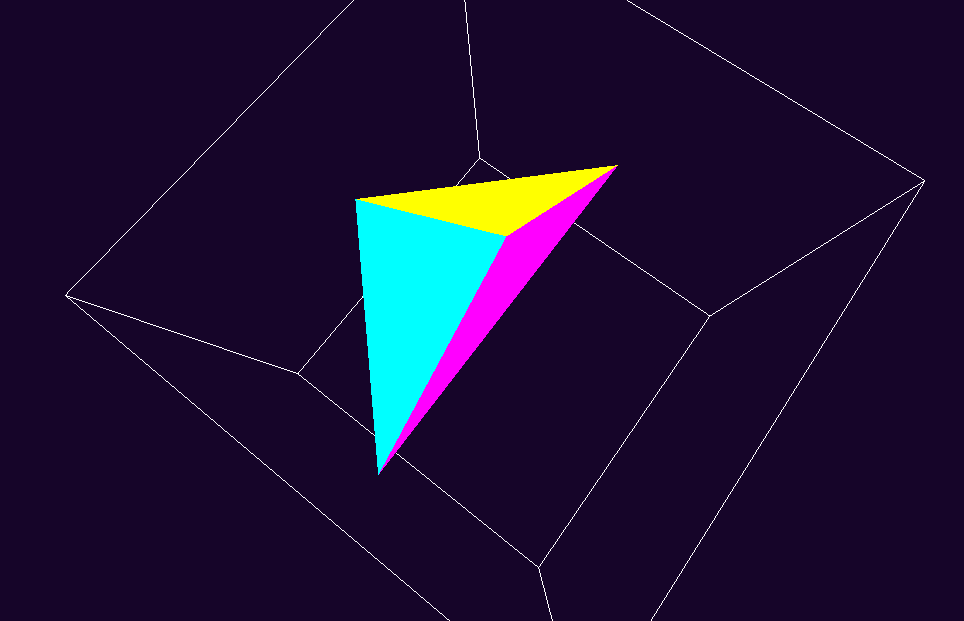

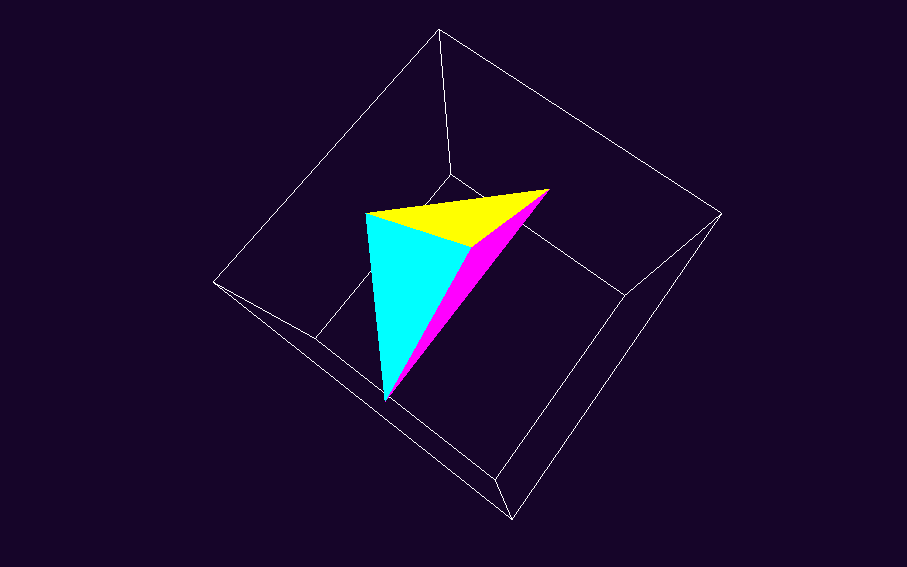